<a href="https://colab.research.google.com/github/kirill-kozlitin/test_tasks/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%BA%D0%B0%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%B0_%D0%B2%D0%B8%D0%BD%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Бизнес---анализ" data-toc-modified-id="Бизнес---анализ-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Бизнес - анализ</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Визуальный-анализ-данных" data-toc-modified-id="Визуальный-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Визуальный анализ данных</a></span></li></ul></div>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error as mse

import seaborn as sns
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt

pylab.rcParams['figure.figsize'] = 8, 6

## Бизнес - анализ

Цель: определить, какие параметры вина влияют на его вкусовые характеристики

## Анализ данных

Подгружаем датасет с данными о качестве вина:

In [ ]:
wine = pd.read_csv('winequalityN.csv')

Проведем разведочный анализ данных:

In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


**Промежуточный вывод**:
1. Несколько признаков имеют пропуски
2. Целевой признак - quality

In [ ]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


## Подготовка данных

Данных, меющих пропуски очень немного. Поэтому, такие записи просто отбросим.

Перекодируем признак type методом OHE:

In [ ]:
wine['is_white'] = pd.Series(np.where(wine['type'] == 'white', 1, 0), name='is_white')
wine = wine.drop('type', axis=1)

wine.dropna(axis=0, how='any', inplace=True)

**Промежуточный вывод:** Для наших целей такой подготовки данных нам достаточно.

### Разобьем данные на train и test

In [ ]:
X = wine.drop('quality', axis=1)
y = wine['quality']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Визуальный анализ данных

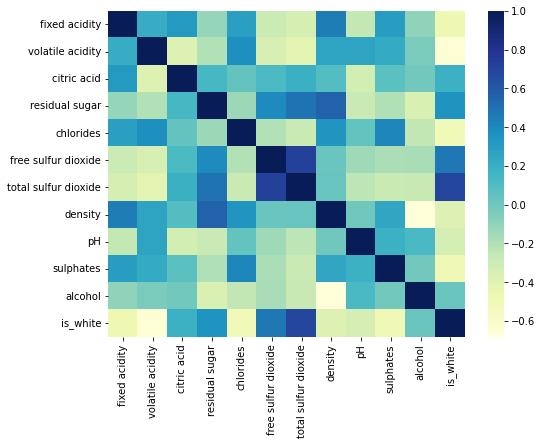

In [ ]:
sns.heatmap(X_train.corr(), cmap="YlGnBu")

Оставим только данные, чья корреляция >= |0.6| 

In [ ]:
wine_corr = X_train.corr().applymap(lambda x: x if x >= 0.6 or x <= -0.6 else 0)

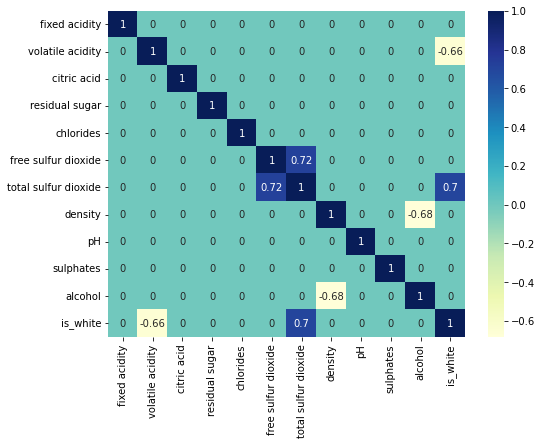

In [ ]:
sns.heatmap(wine_corr, annot=True, cmap="YlGnBu")

**Промежуточный вывод:**
1. Высокую прямую корреляцию имеют пары: total sulfur dioxide - is_white, free sulfur dioxide - total sulfur dioxide
2. Высокую обратную корреляцию имеют пары: volatile acidity - is_white, density_alcohol

Рашифруем:
1. У белого вина выше содержание диоксида серы и ниже летучая кислотность
2. Чем выше содержание алкоголя в вине, тем ниже его плотность
3. Чем выше содержание в вине диоксида серы, тем выше содержание в нем и свободного диоксида серы

Построим бокс-плоты по каждой фиче, чтобы посмотреть на выбросы. В качестве границ усов будем использовать 3-хквартильный размах:

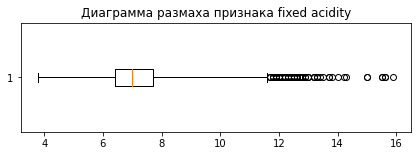

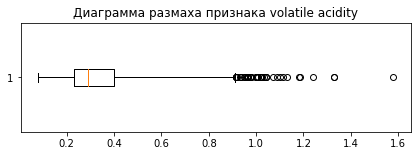

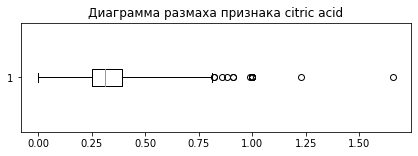

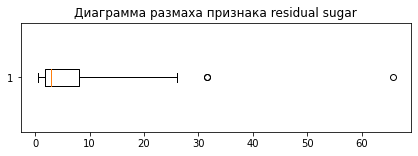

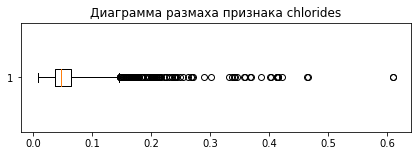

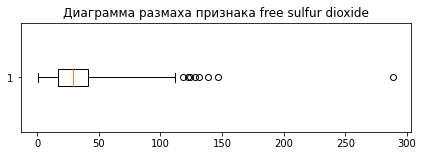

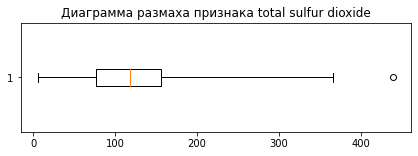

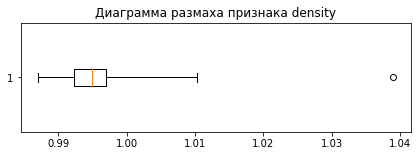

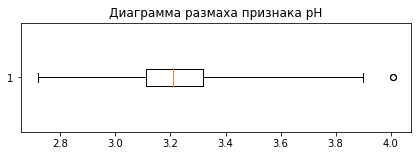

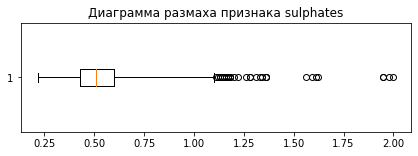

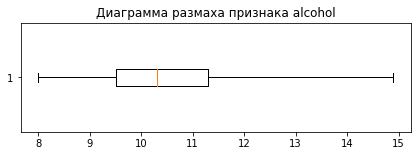

In [ ]:
for col in X_train.columns:
  if col != 'is_white':
    plt.figure(figsize=(7,2))
    plt.boxplot(wine[col], vert=False, whis=3)
    plt.title('Диаграмма размаха признака ' + col)
    plt.show()

**Промежуточный вывод:**
Данные имеют выбросы. Отбросим объекты лежащие за пределами 3-х межквартильных размахов.

In [ ]:
for col in X_train.columns:
  if col != 'is_white':
    q3 = wine[col].quantile(0.75)
    q1 = wine[col].quantile(0.25)
    iqr = q3 - q1

    left_thresh = q1 - 3*iqr
    right_thresh = q3 + 3*iqr

    X_train = X_train.loc[(wine[col] >= left_thresh) & (wine[col] <= right_thresh)]

  y_train = y_train[X_train.index]

In [ ]:
print('Размер выборки:', wine.shape)

Размер выборки: (6463, 13)


Посмотрим как измениась матрица корреляции Пирсона:

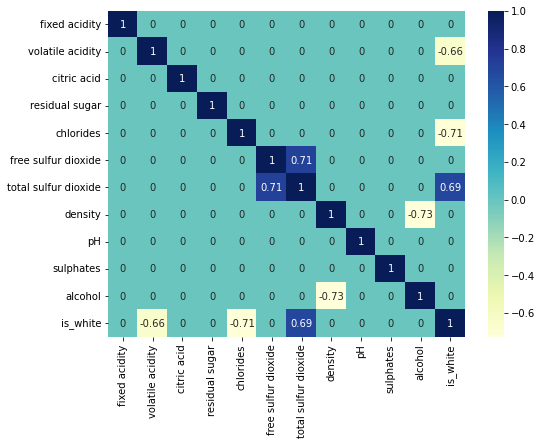

In [ ]:
wine_corr = X_train.corr().applymap(lambda x: x if x >= 0.6 or x <= -0.6 else 0)
sns.heatmap(wine_corr, annot=True, cmap="YlGnBu")

И Спирмана:

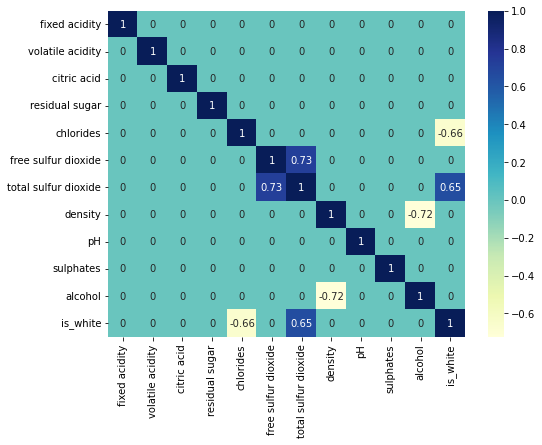

In [ ]:
wine_corr = X_train.corr(method='spearman').applymap(lambda x: x if x >= 0.6 or x <= -0.6 else 0)
sns.heatmap(wine_corr, annot=True, cmap="YlGnBu")

**Вывод:** Значимых изменений не наблюдается. 

### Нормализация

In [ ]:
columns = list(X_train.columns)
columns.remove('is_white')

scaler = StandardScaler()
scaler.fit(X_train[columns])

X_train[columns] = scaler.transform(X_train[columns])
X_test[columns] = scaler.transform(X_test[columns])

Финально смотрим на данные и переходим к моделированию:

In [ ]:
 X_train.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is_white
459,-0.920025,0.667749,0.280477,0.745973,0.345047,3.059562,2.378757,0.870185,0.941957,-0.167874,-1.673195,1
1460,1.248058,-1.047149,3.164082,-0.413166,-0.093247,-0.104424,0.186389,-0.626057,0.377287,-0.922336,1.608369,1
4403,-1.733056,-0.717361,1.093802,0.134791,0.685942,0.598684,1.255395,-0.340727,-0.187383,-0.771444,-0.635436,1


## Моделирование

In [ ]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
y_hat = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
mse_score = mse(y_test, y_hat)

print('MSE SCORE:', str(round(mse_score, 2)))

MSE SCORE: 0.61


Text(0, 0.5, 'Оценка')

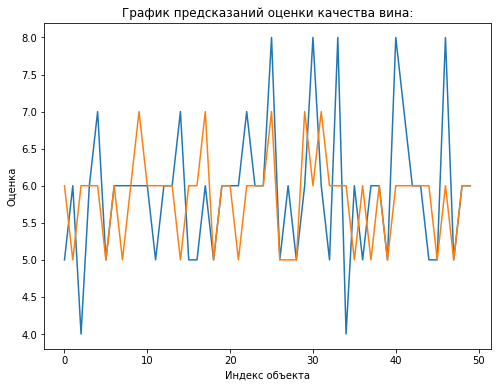

In [ ]:
plt.plot(X_test.reset_index(drop=True).index[0:50], y_test[0:50])
plt.plot(X_test.reset_index(drop=True).index[0:50], y_hat[0:50])
plt.title('График предсказаний оценки качества вина:')
plt.xlabel('Индекс объекта')
plt.ylabel('Оценка')

### Оценка модели:

Сравнивать полученную модель мы будем с примитивной моделью, которая всем наблюдениям присваивает среднее значение оценки качества:

In [ ]:
mean_score = y_train.mean()

In [ ]:
y_hat_dummy = np.array([mean_score for i in range(len(y_test))])

In [ ]:
mse_score_dummy = mse(y_test, y_hat_dummy)
print('MSE DUMMY SCORE:', str(round(mse_score_dummy, 2)))

MSE DUMMY SCORE: 0.79


## Развертывание

In [ ]:
result = pd.DataFrame({'wine_id':y_test.index, 'pred_quality':y_hat})

In [ ]:
#result.to_csv(path)


## Вывод

Выяснили, что:
1. У белого вина выше содержание диоксида серы и ниже летучая кислотность
2. Чем выше содержание алкоголя в вине, тем ниже его плотность
3. Чем выше содержание в вине диоксида серы, тем выше содержание в нем и свободного диоксида серы

Построили модель предсказания оценки качества вина по его параметрам. Полученная модель оказалась лучше случайной.